In [1]:
import sys
import sys
sys.path
sys.path.append('../')
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

import numpy as np
from diamonds import experiments, normal_equation, customSGD


/root/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Discution 1
  - The Second round was used to find best parameters to train the algorithm, since there was no consistency difference between the 3 top configurations, also with the higher number of executions. 
  - We opted here to use the 3 best configurations in 5k iterations.  


In [2]:
X = experiments.load_train_data()
_, (X_train, X_test, y_train, y_test) = experiments.gen_splits(X, scale=True)

## Custom Predictor with the same SKLearn  SGDRegressor Parameters

In [3]:
base_params = {'lr':0.1,
'max_iter':1000,
'batch_sz':50,
'lr_optimizer':'invscaling',
'print_interval':100}

In [4]:
theta = customSGD.SGD(**base_params, 
                      batch_type='Mini',
                      X=X_train, y=np.log(y_train), 
                      )
y_pred = np.exp(customSGD.predict(theta, X_test))

Number of samples: 16864
Number of parameters: 13
It: 1 Batch: 1 Epoch 0 Error: 17.62936172 lr: 0.10000000 
It: 100 Batch: 100 Epoch 0 Error: 0.22754792 lr: 0.03162278 
It: 200 Batch: 200 Epoch 0 Error: 0.05605758 lr: 0.02659148 
It: 300 Batch: 300 Epoch 0 Error: 0.03264680 lr: 0.02402811 
It: 400 Batch: 62 Epoch 1 Error: 0.04593421 lr: 0.02236068 
It: 500 Batch: 162 Epoch 1 Error: 0.04540844 lr: 0.02114743 
It: 600 Batch: 262 Epoch 1 Error: 0.03264338 lr: 0.02020516 
It: 700 Batch: 24 Epoch 2 Error: 0.03496860 lr: 0.01944131 
It: 800 Batch: 124 Epoch 2 Error: 0.02197238 lr: 0.01880302 
It: 900 Batch: 224 Epoch 2 Error: 0.02706188 lr: 0.01825742 
It: 1000 Batch: 324 Epoch 2 Error: 0.02348074 lr: 0.01778279 
Finished 
 It: 1000 Batch: 324 Epoch 2 Error: 0.02348074 lr: 0.01778279 


In [5]:
mini_batch = customSGD.get_iteration_log()
mini_batch.head()

,it,b_it,epoch,error,eta
0,1,1,0,17.629362,0.100000
1,2,2,0,12.523285,0.084090
2,3,3,0,12.607695,0.075984
3,4,4,0,11.156136,0.070711
4,5,5,0,10.500744,0.066874


In [6]:
theta = customSGD.SGD(**base_params, 
                      batch_type='Stochastic',
                      X=X_train, y=np.log(y_train), 
                      )
y_pred = np.exp(customSGD.predict(theta, X_test))

Number of samples: 16864
Number of parameters: 13
Shuffled
It: 1 Batch: 1 Epoch 0 Error: 18.19983026 lr: 0.10000000 
It: 100 Batch: 100 Epoch 0 Error: 0.19544039 lr: 0.03162278 
It: 200 Batch: 200 Epoch 0 Error: 0.05712442 lr: 0.02659148 
It: 300 Batch: 300 Epoch 0 Error: 0.01993114 lr: 0.02402811 
It: 400 Batch: 62 Epoch 1 Error: 0.02150519 lr: 0.02236068 
It: 500 Batch: 162 Epoch 1 Error: 0.03036732 lr: 0.02114743 
It: 600 Batch: 262 Epoch 1 Error: 0.01242636 lr: 0.02020516 
It: 700 Batch: 24 Epoch 2 Error: 0.02227536 lr: 0.01944131 
It: 800 Batch: 124 Epoch 2 Error: 0.01297051 lr: 0.01880302 
It: 900 Batch: 224 Epoch 2 Error: 0.01588972 lr: 0.01825742 
It: 1000 Batch: 324 Epoch 2 Error: 0.01692954 lr: 0.01778279 
Finished 
 It: 1000 Batch: 324 Epoch 2 Error: 0.01692954 lr: 0.01778279 


In [7]:
stoch_batch = customSGD.get_iteration_log()
stoch_batch.head()

,it,b_it,epoch,error,eta
0,1,1,0,18.199830,0.100000
1,2,2,0,15.373216,0.084090
2,3,3,0,12.722183,0.075984
3,4,4,0,9.921614,0.070711
4,5,5,0,8.602824,0.066874


In [8]:
base_params = {'lr':0.1,
'max_iter':1000,
'batch_sz':1,
'lr_optimizer':'invscaling',
'print_interval':100}

In [9]:
theta = customSGD.SGD(**base_params, 
                      batch_type='Single',
                      epsilon=.000000000001,
                      X=X_train, y=np.log(y_train), 
                      )
y_pred = np.exp(customSGD.predict(theta, X_test))

Number of samples: 16864
Number of parameters: 13
It: 1 Batch: 1 Epoch 0 Error: 6.98582804 lr: 0.10000000 
It: 100 Batch: 100 Epoch 0 Error: 0.38225291 lr: 0.03162278 
It: 200 Batch: 200 Epoch 0 Error: 0.01228387 lr: 0.02659148 
It: 300 Batch: 300 Epoch 0 Error: 0.00356710 lr: 0.02402811 
It: 400 Batch: 400 Epoch 0 Error: 0.00078310 lr: 0.02236068 
It: 500 Batch: 500 Epoch 0 Error: 0.00004009 lr: 0.02114743 
It: 600 Batch: 600 Epoch 0 Error: 0.02670075 lr: 0.02020516 
It: 700 Batch: 700 Epoch 0 Error: 0.00183339 lr: 0.01944131 
It: 800 Batch: 800 Epoch 0 Error: 0.00104565 lr: 0.01880302 
It: 900 Batch: 900 Epoch 0 Error: 0.00001425 lr: 0.01825742 
It: 1000 Batch: 1000 Epoch 0 Error: 0.03700524 lr: 0.01778279 
Finished 
 It: 1000 Batch: 1000 Epoch 0 Error: 0.03700524 lr: 0.01778279 


In [10]:
single_inst = customSGD.get_iteration_log()
single_inst.head()

,it,b_it,epoch,error,eta
0,1,1,0,6.985828,0.100000
1,2,2,0,11.001957,0.084090
2,3,3,0,2.046349,0.075984
3,4,4,0,1.282835,0.070711
4,5,5,0,0.100275,0.066874


In [11]:
theta = customSGD.SGD(**base_params, 
                      batch_type='Full',
                      X=X_train, y=np.log(y_train), 
                      )
y_pred = np.exp(customSGD.predict(theta, X_test))

Number of samples: 16864
Number of parameters: 13
It: 1 Batch: 1 Epoch 0 Error: 22.41467288 lr: 0.10000000 
It: 100 Batch: 1 Epoch 99 Error: 0.18969168 lr: 0.03162278 
It: 200 Batch: 1 Epoch 199 Error: 0.06366878 lr: 0.02659148 
It: 300 Batch: 1 Epoch 299 Error: 0.04525947 lr: 0.02402811 
It: 400 Batch: 1 Epoch 399 Error: 0.03986180 lr: 0.02236068 
It: 500 Batch: 1 Epoch 499 Error: 0.03708771 lr: 0.02114743 
It: 600 Batch: 1 Epoch 599 Error: 0.03509010 lr: 0.02020516 
It: 700 Batch: 1 Epoch 699 Error: 0.03342665 lr: 0.01944131 
It: 800 Batch: 1 Epoch 799 Error: 0.03196005 lr: 0.01880302 
It: 900 Batch: 1 Epoch 899 Error: 0.03063512 lr: 0.01825742 
It: 1000 Batch: 1 Epoch 999 Error: 0.02942356 lr: 0.01778279 
Finished 
 It: 1000 Batch: 1 Epoch 999 Error: 0.02942356 lr: 0.01778279 


In [12]:
full_batch = customSGD.get_iteration_log()
full_batch.head()

,it,b_it,epoch,error,eta
0,1,1,0,22.414673,0.100000
1,2,1,1,18.398953,0.084090
2,3,1,2,15.489245,0.075984
3,4,1,3,13.262455,0.070711
4,5,1,4,11.500691,0.066874


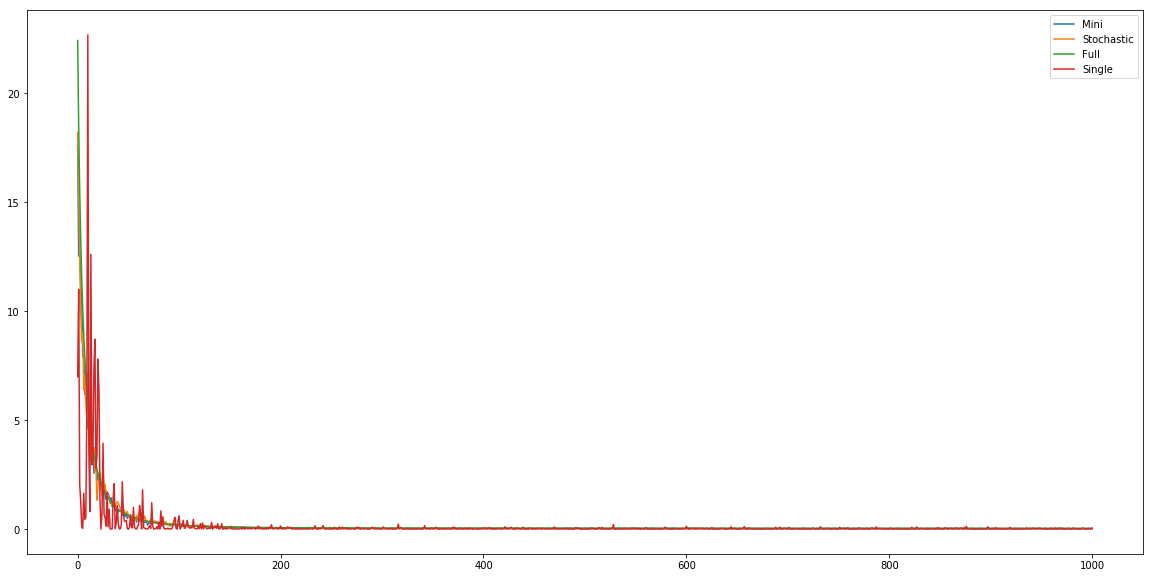

In [13]:
plt.figure(figsize=(20,10))
mini_batch.error.plot(label='Mini')
stoch_batch.error.plot(label='Stochastic')
full_batch.error.plot(label='Full')
single_inst.error.plot(label='Single')
plt.legend()

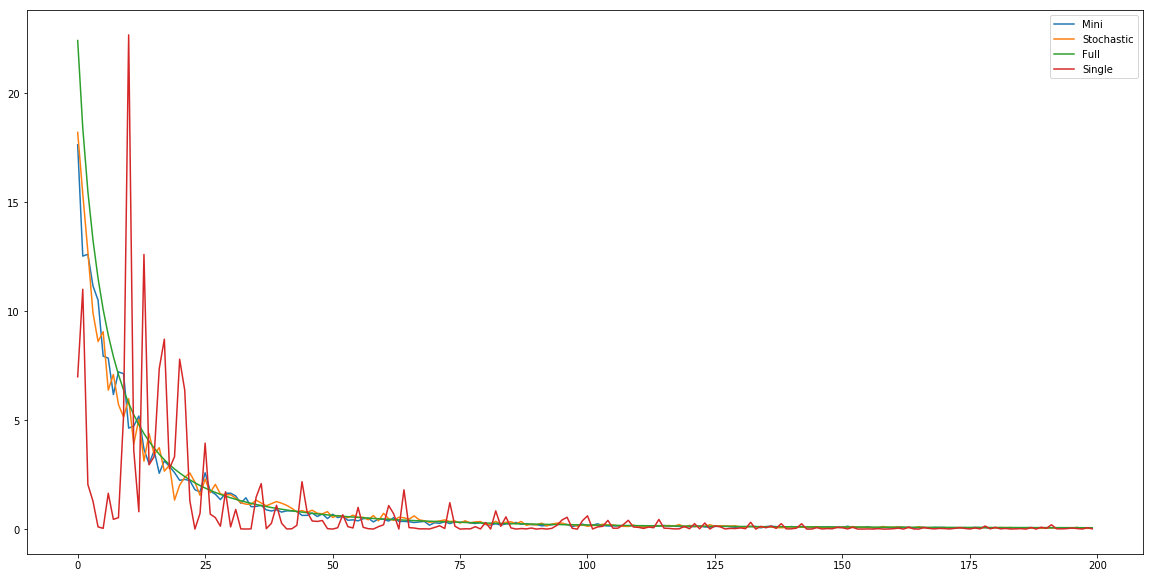

In [14]:
plt.figure(figsize=(20,10))
mini_batch.head(200).error.plot(label='Mini')
stoch_batch.head(200).error.plot(label='Stochastic')
full_batch.head(200).error.plot(label='Full')
single_inst.head(200).error.plot(label='Single')
plt.legend()

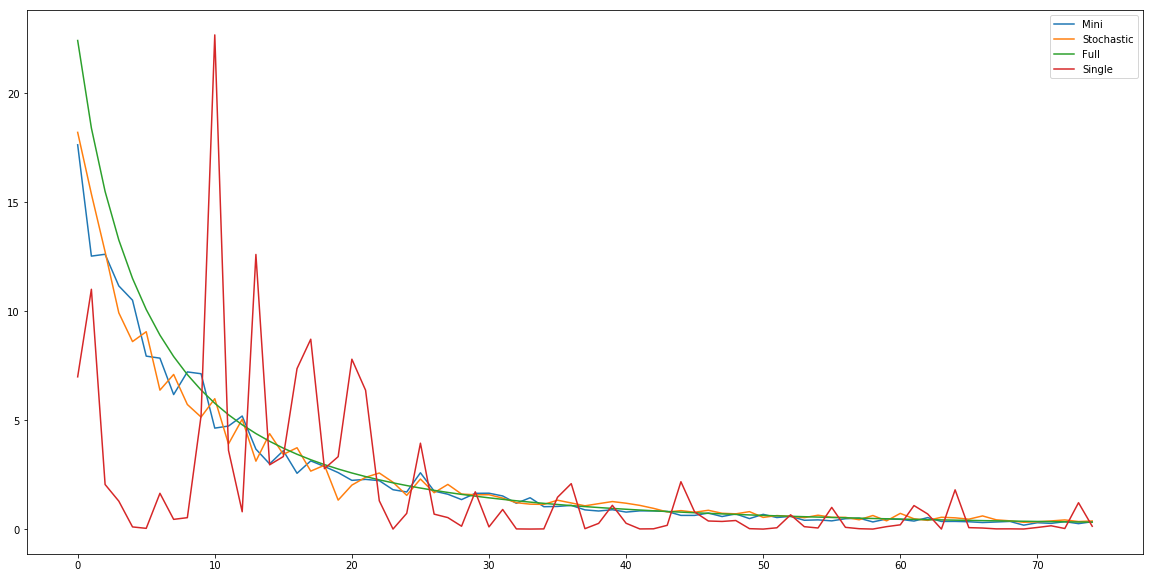

In [15]:
plt.figure(figsize=(20,10))
mini_batch.head(75).error.plot(label='Mini')
stoch_batch.head(75).error.plot(label='Stochastic')
full_batch.head(75).error.plot(label='Full')
single_inst.head(75).error.plot(label='Single')
plt.legend()